# Laser Wakefield Accelerator - Downramp injection

1D simulation of a laser wakefield accelerator.

In [88]:
import em1d
import numpy

# Time step
dt = 0.019

# Simulation time
tmax = 80

# Number of cells
nx  = 1000

# Simulation box size
box = 80.0


## Background plasma

# Particles per cell
ppc = 32

# Use a step density profile
electrons = em1d.Species( "electronsp", -1.0, ppc,
                           density = em1d.Density( type = "slab", start = 20, end = 400))

electronsp = em1d.Species( "electrons", -1.0, ppc,
                         density = em1d.Density( type = "slab", start = 20, end = 40))

electronsr = em1d.Species( "electronsr", -1.0, ppc,
                           density = em1d.Density( type = "ramp", start = 40, end = 45,ramp=[1.0,0.0]))


# Initialize simulation
sim = em1d.Simulation( nx, box, dt, species = [electrons,electronsp,electronsr] )

# Add laser pulse
sim.add_laser( em1d.Laser( start = 17.0, fwhm = 2.0, a0 = 1.25, omega0 = 10.0, polarization = numpy.pi/2 ))

# Set moving window
sim.set_moving_window()

# Set current smoothing
sim.set_smooth( em1d.Smooth(xtype = "compensated", xlevel = 4) )

# Run the simulation
sim.run( dt)



Running simulation up to t = 0.019 ...
n = 2, t = 0.038
Done.


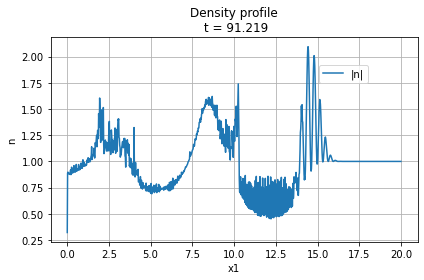

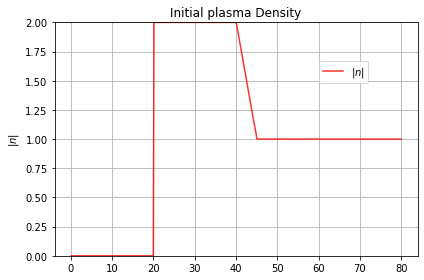

In [89]:
fig, ax1 = plt.subplots()

# Plot values at the center of the cells
xmin = sim.emf.dx/2
xmax = sim.emf.box - sim.emf.dx/2


ax1.plot(numpy.linspace(xmin, xmax, num = sim.nx), numpy.abs(electrons.charge()+electronsr.charge()+electronsp.charge()),'r', label = "$|n|$" , alpha = 0.8)
ax1.set_ylabel("|$n$|")
ax1.set_ylim(0,2)

plt.title("Initial plasma Density")
plt.grid(True)

fig.legend(loc = (0.75,0.70))
fig.tight_layout()

plt.show()


## Longitudinal Electric field and Plasma Density

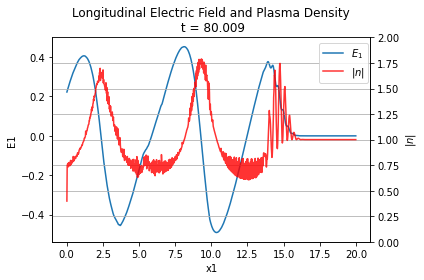

In [83]:
fig, ax1 = plt.subplots()

# Plot values at the center of the cells
xmin = sim.emf.dx/2
xmax = sim.emf.box - sim.emf.dx/2

ax1.plot(numpy.linspace(xmin, xmax, num = sim.nx), sim.emf.Ex, label = "$E_1$" )
ax1.set_xlabel("x1")
ax1.set_ylabel("E1")

ax2 = ax1.twinx()
ax2.plot(numpy.linspace(xmin, xmax, num = sim.nx), numpy.abs(electrons.charge()),'r', label = "$|n|$" , alpha = 0.8)
ax2.set_ylabel("|$n$|")
ax2.set_ylim(0,2)

plt.title("Longitudinal Electric Field and Plasma Density\n t = {:g}".format(sim.t))
plt.grid(True)

fig.legend(loc = (0.75,0.70))
fig.tight_layout()

plt.show()

## x1 - u1 Phasespace

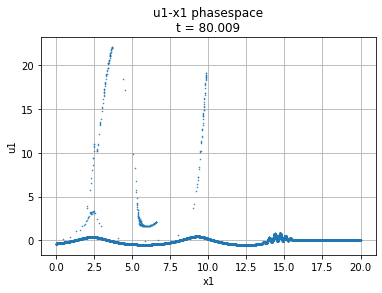

In [84]:
import matplotlib.pyplot as plt

# Simple function to convert particle positions
x = lambda s : (s.particles['ix'] + s.particles['x']) * s.dx 

plt.plot(x(electrons),  electrons.particles['ux'],  '.', ms = 1.)
plt.xlabel("x1")
plt.ylabel("u1")
plt.title("u1-x1 phasespace\nt = {:g}".format(sim.t))
plt.grid(True)
plt.show()